In [2]:
import pandas as pd


In [3]:
df=pd.read_csv(r"C:\Users\09aar\Desktop\SPAM DETECTOR-ML\spam_messages.csv")
df

,label,message
0,spam,Win a free trip to Paris! Enter now! [53]
1,ham,"Hi, are we still on for lunch tomorrow? [61]"
2,spam,You have been selected for a free cruise to th...
3,spam,Free ringtone subscription. Click to activate....
4,spam,Get rich quick! Join our trading platform and ...
...,...,...
195,ham,I’ve sent the email you asked for. [76]
196,spam,Limited offer! Claim your free Amazon voucher ...
197,ham,Don't forget to bring the documents to the mee...
198,ham,Happy birthday! Hope you have a great day. [70]


In [4]:
import pandas as pd
import string
import re
import nltk
from nltk.corpus import stopwords
from nltk.stem import PorterStemmer  # OR use WordNetLemmatizer
from nltk.tokenize import word_tokenize

# Download necessary NLTK data


In [5]:
nltk.download('stopwords')
nltk.download('punkt')
nltk.download('punkt_tab') 

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\09aar\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\09aar\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package punkt_tab to
[nltk_data]     C:\Users\09aar\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt_tab is already up-to-date!


True

In [6]:
stop_words = set(stopwords.words('english'))     #Initialize tools
stemmer = PorterStemmer()

# *Text Preprocessing

In [7]:
def preprocess_text(text):
    text = text.lower()     #  Lowercase

    text = text.translate(str.maketrans('', '', string.punctuation))     #  Remove punctuation
    text = re.sub(r'\d+', '', text)                                       #  Remove numbers
    tokens = word_tokenize(text)                                           #  Tokenization
    tokens = [word for word in tokens if word not in stop_words]            #  Remove stopwords
    tokens = [stemmer.stem(word) for word in tokens]                        # Stemming (or use lemmatization if preferred)
    return ' '.join(tokens)                                                  # Join tokens back to string
df['cleaned_message'] = df['message'].apply(preprocess_text)                  # Apply preprocessing to the 'message' column
print(df[['label', 'message', 'cleaned_message']].head())                      # Show sample



  label                                            message  \
0  spam          Win a free trip to Paris! Enter now! [53]   
1   ham       Hi, are we still on for lunch tomorrow? [61]   
2  spam  You have been selected for a free cruise to th...   
3  spam  Free ringtone subscription. Click to activate....   
4  spam  Get rich quick! Join our trading platform and ...   

                                  cleaned_message  
0                        win free trip pari enter  
1                         hi still lunch tomorrow  
2         select free cruis bahama repli ye claim  
3              free rington subscript click activ  
4  get rich quick join trade platform doubl incom  


# * Encoding Dataset

In [8]:
from sklearn.preprocessing import LabelEncoder
le=LabelEncoder()
df["label"]=le.fit_transform(df["label"])          #LABEL ENCODING
print(df)

     label                                            message  \
0        1          Win a free trip to Paris! Enter now! [53]   
1        0       Hi, are we still on for lunch tomorrow? [61]   
2        1  You have been selected for a free cruise to th...   
3        1  Free ringtone subscription. Click to activate....   
4        1  Get rich quick! Join our trading platform and ...   
..     ...                                                ...   
195      0            I’ve sent the email you asked for. [76]   
196      1  Limited offer! Claim your free Amazon voucher ...   
197      0  Don't forget to bring the documents to the mee...   
198      0    Happy birthday! Hope you have a great day. [70]   
199      0          What time are we meeting for dinner? [91]   

                                    cleaned_message  
0                          win free trip pari enter  
1                           hi still lunch tomorrow  
2           select free cruis bahama repli ye claim  
3  

In [9]:
df

,label,message,cleaned_message
0,1,Win a free trip to Paris! Enter now! [53],win free trip pari enter
1,0,"Hi, are we still on for lunch tomorrow? [61]",hi still lunch tomorrow
2,1,You have been selected for a free cruise to th...,select free cruis bahama repli ye claim
3,1,Free ringtone subscription. Click to activate....,free rington subscript click activ
4,1,Get rich quick! Join our trading platform and ...,get rich quick join trade platform doubl incom
...,...,...,...
195,0,I’ve sent the email you asked for. [76],’ sent email ask
196,1,Limited offer! Claim your free Amazon voucher ...,limit offer claim free amazon voucher
197,0,Don't forget to bring the documents to the mee...,dont forget bring document meet
198,0,Happy birthday! Hope you have a great day. [70],happi birthday hope great day


# * Split Dataset

In [10]:
from sklearn.model_selection import train_test_split
x=df["cleaned_message"]
y=df["label"]
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2,random_state=42)

# Feature Extraction

In [11]:
from sklearn.feature_extraction.text import TfidfVectorizer         #Convert text into numbers (because ML models need numeric input):
tfidf=TfidfVectorizer()
x_train_vec=tfidf.fit_transform(x_train)
x_test_vec=tfidf.transform(x_test)
print(tfidf.get_feature_names_out())


['access' 'account' 'act' 'activ' 'adult' 'amazon' 'appli' 'ask' 'attach'
 'avail' 'bahama' 'birthday' 'brand' 'bring' 'call' 'card' 'cash' 'catch'
 'channel' 'check' 'claim' 'class' 'click' 'compromis' 'congratul'
 'content' 'coupon' 'cruis' 'day' 'deliv' 'detail' 'dinner' 'discount'
 'discuss' 'document' 'dont' 'doubl' 'earlier' 'earn' 'email' 'enter'
 'even' 'exam' 'exclus' 'file' 'final' 'find' 'forget' 'free' 'galaxi'
 'get' 'gift' 'good' 'great' 'gym' 'happi' 'help' 'hey' 'hi' 'home' 'hope'
 'ill' 'immedi' 'incom' 'instantli' 'invest' 'iphon' 'join' 'late' 'later'
 'let' 'limit' 'link' 'loan' 'lotteri' 'lowinterest' 'luck' 'lunch' 'meet'
 'miss' 'money' 'must' 'need' 'netflix' 'new' 'notic' 'offer' 'parcel'
 'pari' 'plan' 'platform' 'pleas' 'pm' 'prize' 'project' 'quick' 'reach'
 'receiv' 'repli' 'report' 'reschedul' 'review' 'rich' 'rington' 'safe'
 'samsung' 'secur' 'see' 'select' 'send' 'sent' 'someth' 'still' 'stream'
 'stuck' 'subscript' 'talk' 'thank' 'thousand' 'ticket' 't

In [12]:
print(x_train_vec)
print(x_test_vec)

  (0, 12)	0.43908849517825793
  (0, 84)	0.43908849517825793
  (0, 66)	0.43908849517825793
  (0, 22)	0.2814083814692132
  (0, 40)	0.3868003314983707
  (0, 30)	0.43908849517825793
  (1, 35)	0.4145476281005139
  (1, 47)	0.48276305892703275
  (1, 13)	0.48276305892703275
  (1, 34)	0.48276305892703275
  (1, 78)	0.3591235871430348
  (2, 28)	1.0
  (3, 28)	1.0
  (4, 96)	0.595502874072524
  (4, 59)	0.5392148495198618
  (4, 104)	0.595502874072524
  (5, 110)	0.5773502691896257
  (5, 39)	0.5773502691896257
  (5, 7)	0.5773502691896257
  (6, 109)	0.5
  (6, 94)	0.5
  (6, 44)	0.5
  (6, 41)	0.5
  (7, 96)	0.595502874072524
  (7, 59)	0.5392148495198618
  :	:
  (153, 43)	0.3837802230657186
  (153, 79)	0.4782437267512588
  (154, 96)	0.595502874072524
  (154, 59)	0.5392148495198618
  (154, 104)	0.595502874072524
  (155, 117)	0.5773502691896257
  (155, 56)	0.5773502691896257
  (155, 37)	0.5773502691896257
  (156, 48)	0.24858583074463708
  (156, 20)	0.27359626768014933
  (156, 108)	0.3665773289726626
  (156, 2

# Model Training

In [13]:
from sklearn.naive_bayes import MultinomialNB
model=MultinomialNB()
model.fit(x_train_vec,y_train)

MultinomialNB()

# * Model Evaluation

In [30]:
# from sklearn.metrics import accuracy_score
# y_pred=model.predict(x_test_vec)                       # x_test ke prediction kr raha h
# accuracy=accuracy_score(y_test,y_pred)
# print("Accuracy:",accuracy)

              precision  recall  f1-score  support
0                   1.0     1.0       1.0     25.0
1                   1.0     1.0       1.0     15.0
accuracy            1.0     1.0       1.0      1.0
macro avg           1.0     1.0       1.0     40.0
weighted avg        1.0     1.0       1.0     40.0


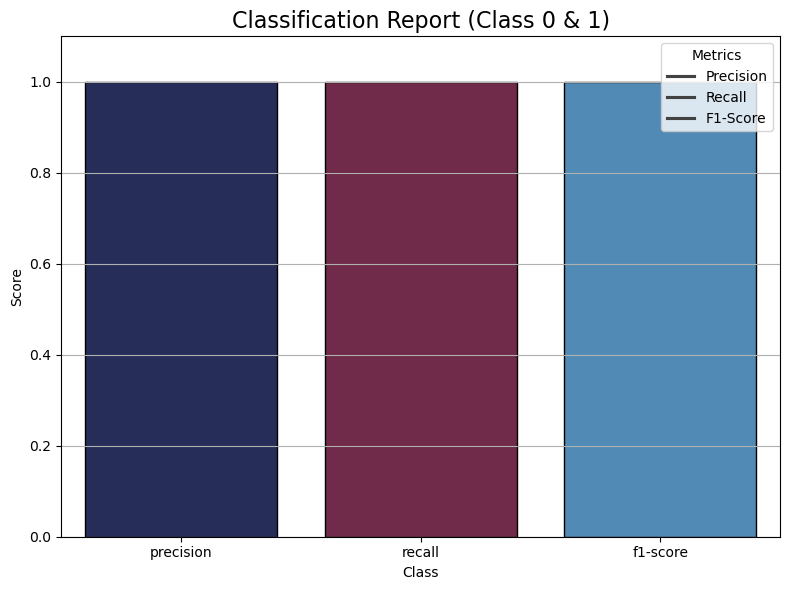

In [14]:
from sklearn.metrics import classification_report
import seaborn as sns
import matplotlib.pyplot as plt


# Get report as dictionary
y_pred=model.predict(x_test_vec)
report = classification_report(y_test, y_pred, output_dict=True)
# print("Report:",report)

# Convert to DataFrame
df_report = pd.DataFrame(report).transpose()
print(df_report)

# Remove support column
df_plot = df_report.drop(columns=["support"], errors="ignore")

# Plot only for class '0' and '1'

plt.figure(figsize=(8, 6))
colors=["#1E2761","#7A2048","#408EC6"]
sns.barplot(data=df_plot.loc[["0", "1"]],palette=colors,edgecolor="black")
plt.title("Classification Report (Class 0 & 1)", fontsize=16)
plt.ylabel("Score")
plt.xlabel("Class")
plt.ylim(0, 1.1)
plt.legend(title="Metrics", labels=["Precision", "Recall", "F1-Score"])
plt.grid(axis='y')
plt.tight_layout()
plt.show()


# Confusion Matrix

In [15]:
from sklearn.metrics import confusion_matrix
cm=confusion_matrix(y_test, y_pred)
print("Confusion Matrix:",cm)

Confusion Matrix: [[25  0]
 [ 0 15]]


In [33]:
msg = tfidf.transform(["Congratulations! You've won a prize."])
print("Prediction:", model.predict(msg))  # Output: [1] → spam


Prediction: [1]


# Prediction for New Messages!

In [16]:
test1 = tfidf.transform(["Win a free iPhone now!"])
print("Prediction 1:", model.predict(test1))              # Expected: [1]

test2 = tfidf.transform(["Can you send the files today?"])
print("Prediction 2:", model.predict(test2))                # Expected: [0]

test3 = tfidf.transform(["Urgent! You have won a lottery worth $10,000"])
print("Prediction 3:", model.predict(test3))                 # Expected: [1]

test4=tfidf.transform(["let's meet tomorrow for dinner"])
print("prediction 4:",model.predict(test4))                     # Expected: [0]        

test5=tfidf.transform(["Earn money from home without any investment. Sign up now!"])
print("prediction 5:",model.predict(test5))                        # Expected: [1]

test6=tfidf.transform(["You have been selected for a free cruise to the Bahamas. Reply YES to claim."])
print("prediction 6:",model.predict(test6))                           # Expected: [1]

test7=tfidf.transform(["Meeting is rescheduled to 3 PM today."])
print("prediction 7:",model.predict(test7))                           # Expected: [0]


test8=tfidf.transform(["Don't forget to bring the documents to the meeting."])
print("prediction 8:",model.predict(test8))                           # Expected: [0]

test9=tfidf.transform(["Can you send me the project files by evening?"])
print("prediction 9:",model.predict(test9))                           # Expected: [0]



Prediction 1: [1]
Prediction 2: [0]
Prediction 3: [1]
prediction 4: [0]
prediction 5: [1]
prediction 6: [1]
prediction 7: [0]
prediction 8: [0]
prediction 9: [0]


# Model Comparison and Evaluation Pipeline

In [17]:
from sklearn.naive_bayes import MultinomialNB
from sklearn.linear_model import LogisticRegression
from sklearn.svm import LinearSVC
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, accuracy_score
import pandas as pd

# Define models
models = {
    "Naive Bayes": MultinomialNB(),
    "Logistic Regression": LogisticRegression(),
    "SVM": LinearSVC(),
    "Random Forest": RandomForestClassifier()
}

# Store results
results = []

for name, model in models.items():
    model.fit(x_train_vec, y_train)
    y_pred = model.predict(x_test_vec)
    report = classification_report(y_test, y_pred, output_dict=True)

    # Extract required metrics for class '1' (spam)
    results.append({
        "Model": name,
        "Accuracy": accuracy_score(y_test, y_pred),
        "Precision (Spam)": report['1']['precision'],
        "Recall (Spam)": report['1']['recall'],
        "F1-score (Spam)": report['1']['f1-score']
    })

# Create and display comparison table
df_results = pd.DataFrame(results)
print(df_results)


                 Model  Accuracy  Precision (Spam)  Recall (Spam)  \
0          Naive Bayes       1.0               1.0            1.0   
1  Logistic Regression       1.0               1.0            1.0   
2                  SVM       1.0               1.0            1.0   
3        Random Forest       1.0               1.0            1.0   

   F1-score (Spam)  
0              1.0  
1              1.0  
2              1.0  
3              1.0  


# Naive Bayes Model

In [18]:
test_msg = [
    "Win a free iPhone today!",
    "Can we meet tomorrow at 5?",
    "Claim your free prize now!",
    "Upload your project on Google Drive please"
]

for i, msg in enumerate(test_msg):
    vec = tfidf.transform([msg])
    model = models["Naive Bayes"]
    pred = model.predict(vec)
    print(f"Prediction {i+1}: {msg} => {'Spam' if pred[0]==1 else 'Ham'}")


Prediction 1: Win a free iPhone today! => Spam
Prediction 2: Can we meet tomorrow at 5? => Ham
Prediction 3: Claim your free prize now! => Spam
Prediction 4: Upload your project on Google Drive please => Ham


# Logistic Regression Model

In [19]:
test_msg = [
    "Win a free iPhone today!",
    "Can we meet tomorrow at 5?",
    "Claim your free prize now!",
    "Upload your project on Google Drive please"
]

for i, msg in enumerate(test_msg):
    vec = tfidf.transform([msg])
    model = models["Logistic Regression"]
    pred = model.predict(vec)
    print(f"Prediction {i+1}: {msg} => {'Spam' if pred[0]==1 else 'Ham'}")


Prediction 1: Win a free iPhone today! => Spam
Prediction 2: Can we meet tomorrow at 5? => Ham
Prediction 3: Claim your free prize now! => Spam
Prediction 4: Upload your project on Google Drive please => Ham


# SVM Model

In [20]:
test_msg = [
    "Win a free iPhone today!",
    "Can we meet tomorrow at 5?",
    "Claim your free prize now!",
    "Upload your project on Google Drive please"
]

for i, msg in enumerate(test_msg):
    vec = tfidf.transform([msg])
    model = models["SVM"]
    pred = model.predict(vec)
    print(f"Prediction {i+1}: {msg} => {'Spam' if pred[0]==1 else 'Ham'}")


Prediction 1: Win a free iPhone today! => Spam
Prediction 2: Can we meet tomorrow at 5? => Ham
Prediction 3: Claim your free prize now! => Spam
Prediction 4: Upload your project on Google Drive please => Ham


# Random Forest Model

In [21]:
test_msg = [
    "Win a free iPhone today!",
    "Can we meet tomorrow at 5?",
    "Claim your free prize now!",
    "Upload your project on Google Drive please"
]

for i, msg in enumerate(test_msg):
    vec = tfidf.transform([msg])
    model = models["Random Forest"]
    pred = model.predict(vec)
    print(f"Prediction {i+1}: {msg} => {'Spam' if pred[0]==1 else 'Ham'}")


Prediction 1: Win a free iPhone today! => Spam
Prediction 2: Can we meet tomorrow at 5? => Ham
Prediction 3: Claim your free prize now! => Spam
Prediction 4: Upload your project on Google Drive please => Ham


In [22]:
import joblib

joblib.dump(model, "spam_classifier_model.pkl")         #save the model
joblib.dump(tfidf, "tfidf_vectorizer.pkl")              # Save the TF-IDF vectorizer

model = joblib.load("spam_classifier_model.pkl")        # Load the model
tfidf = joblib.load("tfidf_vectorizer.pkl")             # Load the vectorizer


# Extra Featuures

In [23]:
import numpy as np
import pandas as pd
from datetime import datetime, timedelta

np.random.seed(42)  # Set seed for reproducibility

# Step 1: Generate random sent times (between 8 AM and 11 PM)
random_times = [datetime(2025, 7, 21, np.random.randint(8, 11), np.random.randint(0, 60)) for _ in range(len(df))]
df["Sent_time"] = random_times

# Step 2: Create time_received by adding delay of 0–4 minutes
df["time_received"] = df["Sent_time"] + pd.to_timedelta(np.random.randint(0, 5, size=len(df)), unit='m')

# Step 3: Extract hour from Sent_time
df["hour"] = df["Sent_time"].dt.hour

# View first few rows
df.head()


,label,message,cleaned_message,Sent_time,time_received,hour
0,1,Win a free trip to Paris! Enter now! [53],win free trip pari enter,2025-07-21 10:51:00,2025-07-21 10:55:00,10
1,0,"Hi, are we still on for lunch tomorrow? [61]",hi still lunch tomorrow,2025-07-21 08:14:00,2025-07-21 08:18:00,8
2,1,You have been selected for a free cruise to th...,select free cruis bahama repli ye claim,2025-07-21 10:07:00,2025-07-21 10:07:00,10
3,1,Free ringtone subscription. Click to activate....,free rington subscript click activ,2025-07-21 08:20:00,2025-07-21 08:22:00,8
4,1,Get rich quick! Join our trading platform and ...,get rich quick join trade platform doubl incom,2025-07-21 10:57:00,2025-07-21 10:58:00,10


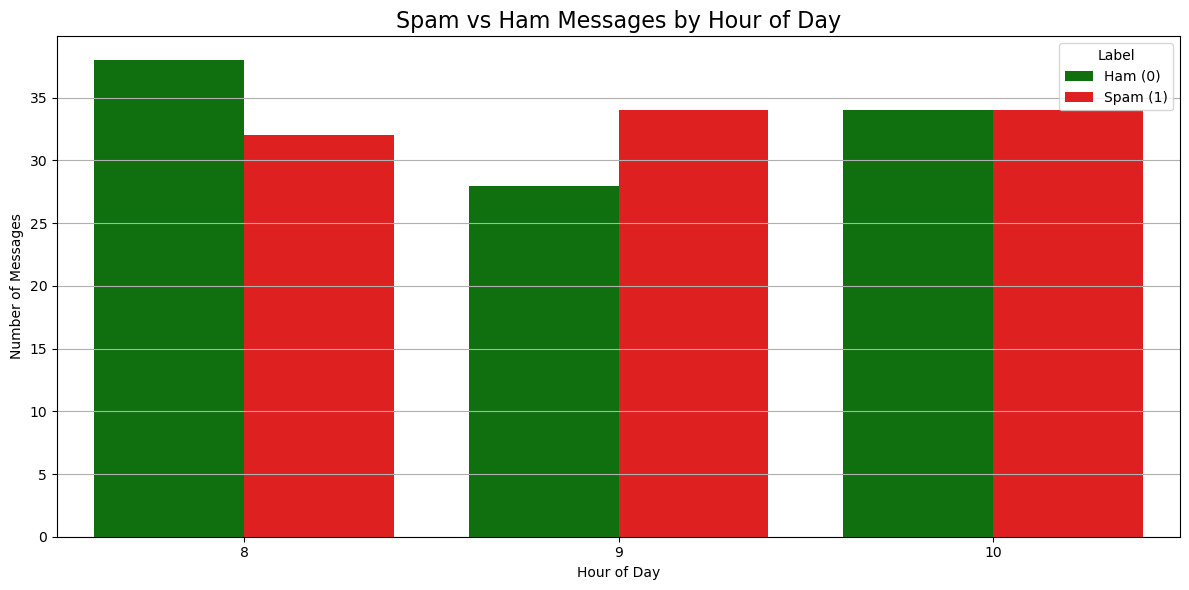

In [24]:
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(12,6))
sns.countplot(x="hour", hue="label", data=df, palette=["green", "red"])
plt.title("Spam vs Ham Messages by Hour of Day", fontsize=16)
plt.xlabel("Hour of Day")
plt.ylabel("Number of Messages")
plt.legend(title="Label", labels=["Ham (0)", "Spam (1)"])
plt.grid(axis="y")
plt.tight_layout()
plt.show()


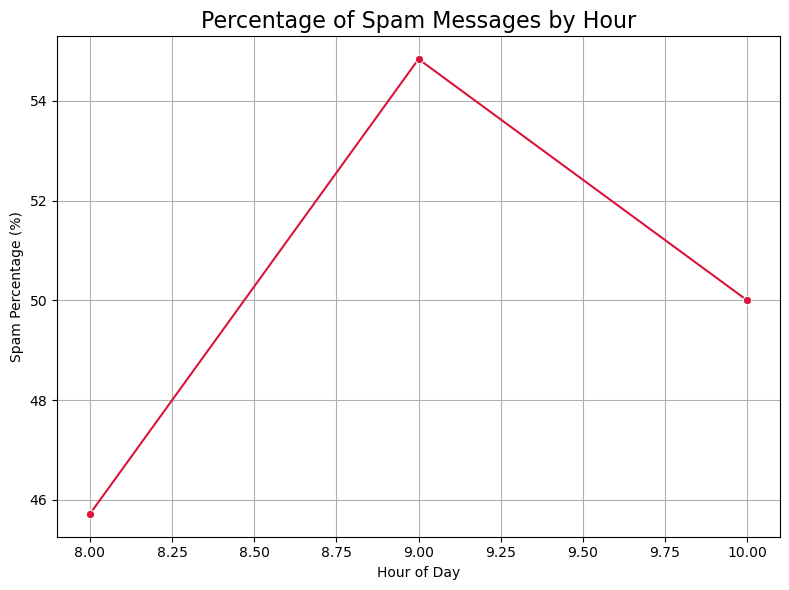

In [27]:
hourly_stats = df.groupby("hour")["label"].agg(["count", "sum"])  # sum = number of spams
hourly_stats["spam_percent"] = (hourly_stats["sum"] / hourly_stats["count"]) * 100

plt.figure(figsize=(8,6))
sns.lineplot(x=hourly_stats.index, y=hourly_stats["spam_percent"], marker="o", color="crimson")
plt.title("Percentage of Spam Messages by Hour", fontsize=16)
plt.xlabel("Hour of Day")
plt.ylabel("Spam Percentage (%)")
plt.grid()
plt.tight_layout()
plt.show()
